 # Experiment 4: Binary classification

Content

1. Introduction
2. Used libraries
3. Reading Clean Data from a CSV File
4. Case of study and data understanding
5. Split the data
6. Assess Baseline Model
7. Training a model
    
    7.1 Decision Tree Classifier
    
    7.2 Decision Tree Classifier with different min_samples_split
    
    7.3 Decision Tree Classifier with different max_depth
    
    7.4 Decision Tree Classifier with different max_depth and min_samples_split
    
    7.5 Random Forest Classifier
    
    7.6 Random Forest Classifier with n_estimators
    
    7.7 Random Forest Classifier with max_depth
    
    7.8 Random Forest Classifier with min_samples_leaf
    
    7.9 Random Forest Classifier with max_features
    
    7.10 Extra trees Classifier
    
    
8. Conclusion
9. References

## 1. Introduction

In the following study, we will fit a binary classification model using Decision tree,  random forest and extra trees classifier to predict if an existing customer is more likely to buy a new car as accurate as possible.

## 2. Used libraries 

In [1]:
#working with data
import pandas as pd
import numpy as np

#plotting data
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 3. Reading Clean Data from a CSV File

Clean data:

In [4]:
df_cleaned = pd.read_csv("df_cleaned1.csv")
#clean columns
df_cleaned.drop(df_cleaned.columns[0], axis=1, inplace=True)

In [5]:
df_cleaned.shape

(131337, 17)

In [6]:
df_cleaned

,Target,age_band,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,Female,Male
0,0,3,1,3,9,2,10,3,7,5,6,9,8,10,4,0,1
1,0,0,2,1,6,10,3,10,4,9,10,6,10,7,10,0,0
2,0,0,3,2,9,10,9,10,9,10,10,7,10,6,10,0,1
3,0,0,3,2,5,8,5,8,4,5,6,4,10,9,7,0,0
4,0,0,2,1,8,9,4,10,7,9,8,5,4,4,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,0,3,2,7,10,10,9,10,10,10,3,6,10,10,0,0
131333,1,0,3,2,4,10,10,10,10,10,10,2,3,10,10,0,0
131334,1,0,5,2,4,4,9,5,4,3,8,4,7,10,10,0,0
131335,1,0,5,2,2,1,10,1,10,9,8,3,6,7,10,0,0


## 4. Case of study and data understanding 

**[4.1]** Hypothesis

The case study has the following hypothesis:
We will train several models like decision tree, random forest and extra trees Classifier to predict if an existing customer is more likely to buy a new car. Assuming that decision trees-based algorithms will perform better base on the categorical features predominant for this dataset.

## 5. Split the data 

**[5.1]** Split data and test

Stratify=y will be used to distribute the data for train, valid and test proportionally, preserving the distribution of the two classes (Brownlee, 2020a), (Brownlee, 2020d).

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_cleaned.columns

Index(['Target', 'age_band', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'Female', 'Male'],
      dtype='object')

In [9]:
X = df_cleaned[['age_band', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'Female', 'Male']].values
y = df_cleaned['Target'].values

In [10]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
X_data.shape

(105069, 16)

In [12]:
y_data.shape

(105069,)

In [13]:
X_test.shape

(26268, 16)

In [14]:
y_test.shape

(26268,)

**[5.2]** Split train and validation

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(84055, 16)
(21014, 16)
(26268, 16)
(84055,)
(21014,)
(26268,)


**[5.3]** Count classes

In [17]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

In [18]:
np.unique(y_val, return_counts=True)

(array([0, 1], dtype=int64), array([20449,   565], dtype=int64))

In [19]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([25564,   704], dtype=int64))

The count per label indicates that we are preserving the class distribution with 2,7% values class 1 over class 0.

## 6. Assess Baseline Model

This study will use F2 score. The reason behind the metric selection is based on the highly imbalanced dataset and the fact that we care more about positive class for the purpose of the prediction (Czakon, 2022) (Malato, 2021) and (Olugbenga, 2022). 

We want the prediction of repurchases to be as correct as possible and avoid false negative predictions (type II error) where the campaigns can lose potential clients. Moreover, we will prevent excessive type I error by predicting false potential clients.

This phenomenon could occur easily in this dataset due to the unbalanced classes in the study. (Brownlee, 2020a)(Brownlee, 2020b)


**[6.1]** base model

In [20]:
from statistics import mode

In [21]:
y_mode = mode(y_train)
y_mode

0

In [22]:
y_train.shape

(84055,)

In [23]:
y_base = np.full(y_train.shape, y_mode)

In [24]:
y_base

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
y_base.shape

(84055,)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

In [27]:
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))
print(precision_score(y_train, y_base))
print(recall_score(y_train, y_base))
print(average_precision_score(y_train, y_base))
print(fbeta_score(y_train, y_base, beta=2, pos_label=1, average='binary'))

0.9732080185592766
0.9599939169916978
0.0
0.0
0.026791981440723336
0.0


**[6.2]** confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
results = confusion_matrix(y_train, y_base)
print(results)

[[81803     0]
 [ 2252     0]]


**[6.3]** Count classes

In [30]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

## 7. Training a model

Based on: (So, 2023), (scikit-learn developers, 2023a) and (scikit-learn developers, 2023b)

note: We will not use data standardisation since algorithms based on decision trees are invariant according to the scale of the data and do not use distance metrics for the learning process (Filho, 2023).

**[7.1]** Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

In [160]:
tree_default = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [161]:
tree_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [162]:
y_train_preds = tree_default.predict(X_train)

In [163]:
#score for the train set
print(accuracy_score(y_train, y_train_preds_tree_default))
print(f1_score(y_train, y_train_preds_tree_default, average='weighted'))
print(precision_score(y_train, y_train_preds_tree_default))
print(recall_score(y_train, y_train_preds_tree_default))
print(average_precision_score(y_train, y_train_preds_tree_default))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

1.0
1.0
1.0
1.0
1.0
1.0


In [164]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds)
print(results)

[[81803     0]
 [    0  2252]]


In [165]:
#precision-recall auc curve
probs = tree_default.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('DT PR AUC: %.3f' % auc_score)

DT PR AUC: 1.000


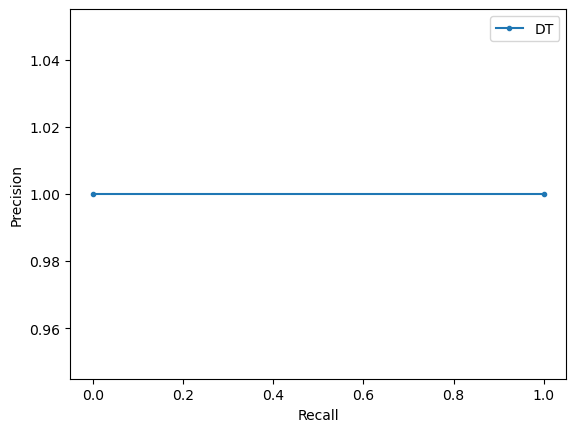

In [166]:
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='DT')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [167]:
#score for the validation set
y_val_preds = tree_default.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9872941848291615
0.9871543349011839
0.7759259259259259
0.7415929203539823
0.5823689225054097
0.7482142857142857


In [168]:
#precision-recall auc curve
probs = tree_default.predict_proba(X_val)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_val, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('DT PR AUC: %.3f' % auc_score)

DT PR AUC: 0.762


In [169]:
#score for the test set
y_test_preds = tree_default.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9868280797929039
0.9865723682137181
0.7753846153846153
0.7159090909090909
0.5627187218141992
0.727062896710906


In [170]:
#precision-recall auc curve
probs = tree_default.predict_proba(X_test)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_test, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('DT PR AUC: %.3f' % auc_score)

DT PR AUC: 0.749


**[7.2]** Decision Tree Classifier with different min_samples_split

Based on: (scikit-learn developers, 2023a) and (So, 2023) 

In [215]:
min_samples_split_values = [i for i in (2, 3, 5, 10, 20)]
scores = []

for m in min_samples_split_values:
    tree = DecisionTreeClassifier(random_state=42,  min_samples_split= m, class_weight='balanced')
    tree.fit(X_train, y_train)
    y_train_preds = tree.predict(X_train)
    score = fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'average_precision Score')

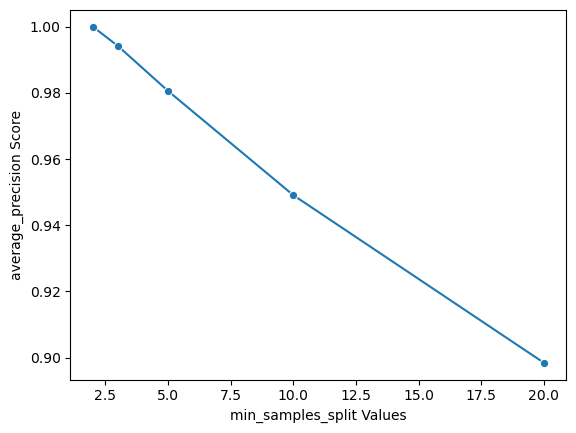

In [216]:
sns.lineplot(x = min_samples_split_values, y = scores, marker = 'o')
plt.xlabel("min_samples_split Values")
plt.ylabel("average_precision Score")

In [217]:
scores

[1.0,
 0.9941726999823417,
 0.980579987808064,
 0.9490896830748483,
 0.898428149684832]

In [178]:
best_index = np.argmax(scores)
best_min_samples_split_values = min_samples_split_values[best_index]

best_min_samples_split_values

2

The best min_samples_split_values is equal to the default

**[7.3]** Decision Tree Classifier with different max_depth

Based on: (scikit-learn developers, 2023a) and (So, 2023) 

In [198]:
max_depth_values = [i for i in (30, 32, 34)]
scores = []

for m in max_depth_values:
    tree = DecisionTreeClassifier(random_state=42,  max_depth= m, class_weight='balanced')
    tree.fit(X_train, y_train)
    y_train_preds = tree.predict(X_train)
    score = fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'average_precision Score')

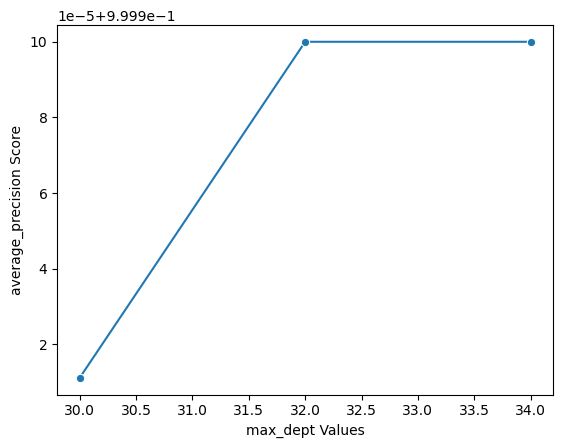

In [199]:
sns.lineplot(x = max_depth_values, y = scores, marker = 'o')
plt.xlabel("max_dept Values")
plt.ylabel("average_precision Score")

In [200]:
scores

[0.9999111979397922, 1.0, 1.0]

In [197]:
best_index = np.argmax(scores)
best_max_depth_values = max_depth_values[best_index]

best_max_depth_values

32

**[7.4]** Decision Tree Classifier with different max_depth and min_samples_split

In [201]:
tree_2 = DecisionTreeClassifier(random_state=42, max_depth=32 , min_samples_split=2 ,class_weight='balanced')

In [202]:
tree_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=32, random_state=42)

In [203]:
y_train_preds = tree_2.predict(X_train)

In [204]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

1.0
1.0
1.0
1.0
1.0
1.0


In [205]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds)
print(results)

[[81803     0]
 [    0  2252]]


In [208]:
#score for the validation set
y_val_preds = tree_2.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9872941848291615
0.9871543349011839
0.7759259259259259
0.7415929203539823
0.5823689225054097
0.7482142857142857


In [218]:
#confusion matrix
results = confusion_matrix(y_val, y_val_preds)
print(results)

[[20328   121]
 [  146   419]]


In [210]:
#score for the test set
y_test_preds = tree_2.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9868280797929039
0.9865723682137181
0.7753846153846153
0.7159090909090909
0.5627187218141992
0.727062896710906


In [219]:
#confusion matrix
results = confusion_matrix(y_test, y_test_preds)
print(results)

[[25418   146]
 [  200   504]]


Analysing feature importance in the model

In [220]:
tree_2.feature_importances_

array([0.00094809, 0.01399427, 0.00730631, 0.0299927 , 0.37990717,
       0.01765774, 0.0254328 , 0.00710035, 0.06595722, 0.02623197,
       0.21241799, 0.10202913, 0.03346681, 0.06751766, 0.00171948,
       0.0083203 ])

In [221]:
X = df_cleaned[['age_band', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'Female', 'Male']]

In [222]:
#dataframe with the values
feat_imp_tree_2 = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': tree_2.feature_importances_
     }
)

In [223]:
feat_imp_tree_2 = feat_imp_tree_2.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_tree_2

,feature,feature_importance
0,sched_serv_warr,0.379907
1,mth_since_last_serv,0.212418
2,annualised_mileage,0.102029
3,num_serv_dealer_purchased,0.067518
4,total_paid_services,0.065957
5,num_dealers_visited,0.033467
6,age_of_vehicle_years,0.029993
7,total_services,0.026232
8,sched_serv_paid,0.025433
9,non_sched_serv_warr,0.017658


In [224]:
import altair as alt

alt.Chart(feat_imp_tree_2).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

**[7.5]** Random Forest Classifier

Based on: (Saxena, 2020)

In [271]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [272]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [273]:
y_train_preds = rf.predict(X_train)

In [274]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

1.0
1.0
1.0
1.0
1.0
1.0


In [275]:
#score for the validation set
y_val_preds = rf.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9921956790710955
0.9917264923923758
0.9546485260770975
0.7451327433628319
0.7181924496572717
0.7793409848204368


In [276]:
#score for the test set
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9920435510887772
0.9915494490845459
0.9541284403669725
0.7386363636363636
0.7117586822072554
0.7735792918774174


**[7.6]** Random Forest Classifier with n_estimators

In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [278]:
n_estimators_values = [i for i in (50, 52, 54, 55, 57, 60)]
scores = []

for n in n_estimators_values:
    rf = RandomForestClassifier(random_state=42, n_estimators= n, class_weight='balanced')
    rf.fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    score = fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'average_precision Score')

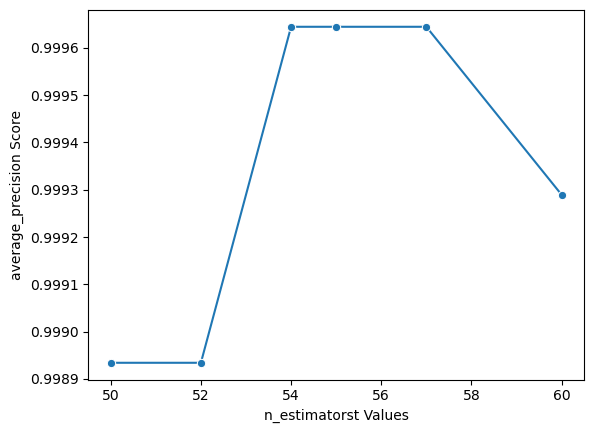

In [279]:
sns.lineplot(x = n_estimators_values, y = scores, marker = 'o')
plt.xlabel("n_estimatorst Values")
plt.ylabel("average_precision Score")

In [280]:
scores

[0.9989339966243226,
 0.9989339966243226,
 0.9996447286615151,
 0.9996447286615151,
 0.9996447286615151,
 0.9992893942085628]

In [281]:
best_index = np.argmax(scores)
best_n_estimators_values = n_estimators_values[best_index]

best_n_estimators_values

54

In [282]:
rf = RandomForestClassifier(random_state=42, n_estimators= best_n_estimators_values, class_weight='balanced')

In [283]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=54,
                       random_state=42)

In [284]:
y_train_preds = rf.predict(X_train)

In [285]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9999881030277794
0.9999881017431328
1.0
0.9995559502664298
0.9995678472386504
0.9996447286615151


In [286]:
#score for the validation set
y_val_preds = rf.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9919101551346722
0.9914149488919473
0.9498861047835991
0.7380530973451327
0.7081093055257476
0.7725083364208966


In [287]:
#score for the test set
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.991662859753312
0.9911005018293938
0.9549718574108818
0.7230113636363636
0.6978789859025641
0.7599283368169604


**[7.7]** Random Forest Classifier with max_depth

In [288]:
max_depth_values = [i for i in (30, 32, 34, 36, 38, 40, 42)]
scores = []

for m in max_depth_values:
    rf = RandomForestClassifier(random_state=42, n_estimators= 54, max_depth = m, class_weight='balanced')
    rf.fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    score = score = fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'average_precision Score')

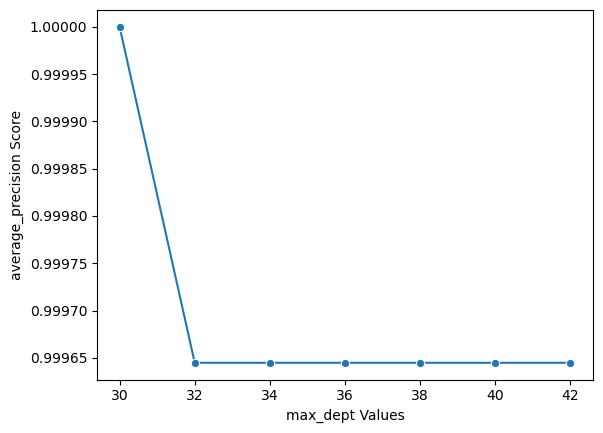

In [289]:
sns.lineplot(x = max_depth_values, y = scores, marker = 'o')
plt.xlabel("max_dept Values")
plt.ylabel("average_precision Score")

In [290]:
scores

[1.0,
 0.9996447286615151,
 0.9996447286615151,
 0.9996447286615151,
 0.9996447286615151,
 0.9996447286615151,
 0.9996447286615151]

In [291]:
best_index = np.argmax(scores)
best_max_depth_values = max_depth_values[best_index]

best_max_depth_values

30

In [304]:
rf = RandomForestClassifier(random_state=42, n_estimators= 54, max_depth = 30, class_weight='balanced')

In [305]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=54,
                       random_state=42)

In [306]:
y_train_preds = rf.predict(X_train)

In [307]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

1.0
1.0
1.0
1.0
1.0
1.0


In [308]:
#score for the validation set
y_val_preds = rf.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9917673931664605
0.9912589289841399
0.9474885844748858
0.7345132743362832
0.7030810409894819
0.7690882134914753


In [309]:
#score for the test set
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9917389980204051
0.9911966086430272
0.9534450651769087
0.7272727272727273
0.7007238664968656
0.763495377274083


**[7.8]** Random Forest Classifier with min_samples_leaf

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [34]:
min_samples_leaf_values = [i for i in (2, 3, 4, 5, 10)]
scores = []

for m in min_samples_leaf_values:
    rf = RandomForestClassifier(random_state=42, n_estimators= 54, max_depth = 30, min_samples_leaf= m, class_weight='balanced')
    rf.fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    score = fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'average_precision Score')

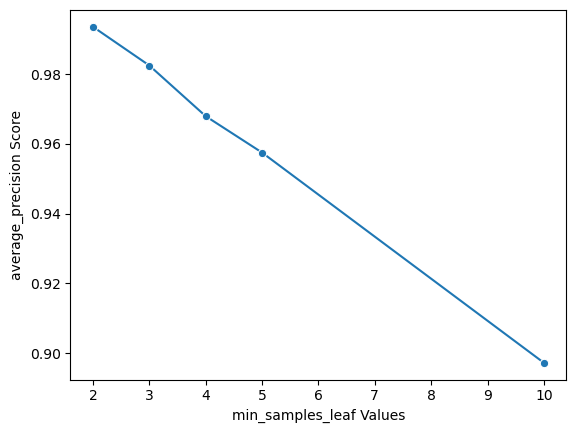

In [35]:
sns.lineplot(x = min_samples_leaf_values, y = scores, marker = 'o')
plt.xlabel("min_samples_leaf Values")
plt.ylabel("average_precision Score")

In [36]:
scores

[0.9935586340774727,
 0.9824546089385474,
 0.9679222566219471,
 0.957482993197279,
 0.8972]

In [37]:
best_index = np.argmax(scores)
best_min_samples_leaf_values = min_samples_leaf_values[best_index]

best_min_samples_leaf_values

2

In [38]:
rf = RandomForestClassifier(random_state=42, n_estimators= 40, max_depth = 11, min_samples_leaf= 2, class_weight='balanced')

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       min_samples_leaf=2, n_estimators=40, random_state=42)

In [40]:
y_train_preds = rf.predict(X_train)

In [41]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9669977990601392
0.9729424102809255
0.4475903614457831
0.9897868561278863
0.44329268704963903
0.7967543608807549


In [42]:
#score for the validation set
y_val_preds = rf.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9617873798420101
0.9688867800326755
0.40746500777604977
0.9274336283185841
0.37984783080682805
0.7388606880992669


In [43]:
#score for the test set
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9620070047205725
0.9691570157144301
0.4093711467324291
0.9431818181818182
0.38763418782812914
0.7480847228481299


**[7.9]** Random Forest Classifier with max_features

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score

In [376]:
max_features_values = [i for i in (5,10,15,16)]
scores = []

for m in max_features_values:
    rf = RandomForestClassifier(random_state=42, n_estimators= 40, max_depth = 11, min_samples_leaf= 1, max_features = m, class_weight='balanced')
    rf.fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    score = fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'average_precision Score')

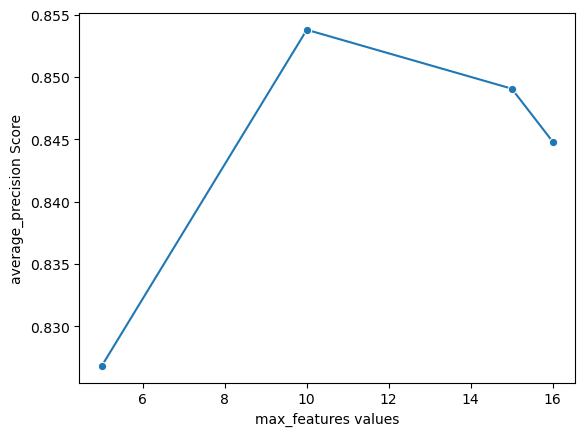

In [377]:
sns.lineplot(x = max_features_values, y = scores, marker = 'o')
plt.xlabel("max_features values")
plt.ylabel("average_precision Score")

In [378]:
scores

[0.826835969406698, 0.8537804784247365, 0.8490566037735849, 0.8448026766025397]

In [379]:
best_index = np.argmax(scores)
best_max_features_values = max_features_values[best_index]

best_max_features_values

10

In [33]:
rf = RandomForestClassifier(random_state=42, n_estimators= 40, max_depth = 11, min_samples_leaf= 1, max_features = 10, class_weight='balanced')

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, max_features=10,
                       n_estimators=40, random_state=42)

In [35]:
y_train_preds = rf.predict(X_train)

In [36]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9785259651418714
0.9814037773186985
0.5559729526671675
0.9857904085257548
0.5484535072500955
0.8537804784247365


In [37]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds)
print(results)#confusion matrix

[[80030  1773]
 [   32  2220]]


In [38]:
#score for the validation set
y_val_preds = rf.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9743028457218997
0.9777639864539052
0.5124378109452736
0.911504424778761
0.46946869823742027
0.7886676875957122


In [39]:
#confusion matrix
results = confusion_matrix(y_val, y_val_preds)
print(results)

[[19959   490]
 [   50   515]]


In [40]:
#score for the test set
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9724760164458657
0.9764473378621902
0.492742551566081
0.9161931818181818
0.45369344501578196
0.7818181818181816


In [41]:
#confusion matrix
results = confusion_matrix(y_test, y_test_preds)
print(results)

[[24900   664]
 [   59   645]]


Analysing feature importance in the model

In [42]:
rf.feature_importances_

array([0.00081442, 0.00658741, 0.00219616, 0.06211542, 0.24747027,
       0.0229832 , 0.10359394, 0.02399918, 0.02842413, 0.09955492,
       0.19861519, 0.09430168, 0.0422143 , 0.05815517, 0.00132913,
       0.00764547])

In [43]:
X = df_cleaned[['age_band', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'Female', 'Male']]

In [44]:
#dataframe with the values
feat_imp_rf = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': rf.feature_importances_
     }
)

In [45]:
feat_imp_rf = feat_imp_rf.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_rf

,feature,feature_importance
0,sched_serv_warr,0.247470
1,mth_since_last_serv,0.198615
2,sched_serv_paid,0.103594
3,total_services,0.099555
4,annualised_mileage,0.094302
5,age_of_vehicle_years,0.062115
6,num_serv_dealer_purchased,0.058155
7,num_dealers_visited,0.042214
8,total_paid_services,0.028424
9,non_sched_serv_paid,0.023999


<AxesSubplot:xlabel='feature_importance', ylabel='feature'>

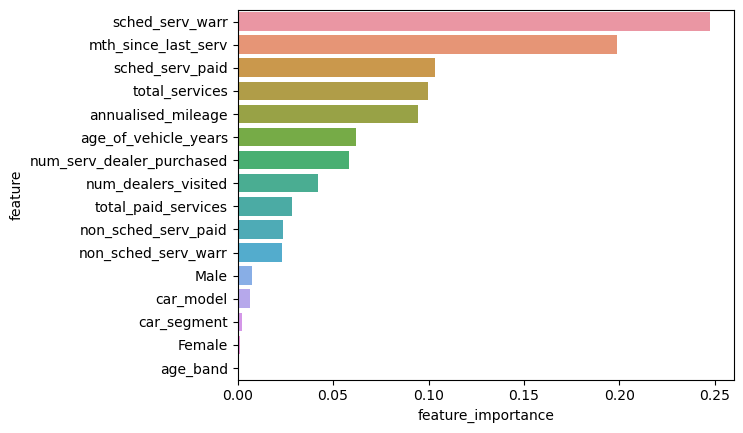

In [53]:
sns.barplot(data= feat_imp_rf, x="feature_importance", y="feature")

**[7.10]** Extra trees Classifier

Based on: (scikit-learn developers, 2023)

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
et = ExtraTreesClassifier(random_state=42, class_weight='balanced')

In [59]:
et.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', random_state=42)

In [60]:
y_train_preds = et.predict(X_train)

In [61]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

1.0
1.0
1.0
1.0
1.0
1.0


In [62]:
#score for the validation set
y_val_preds = et.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9913866945845626
0.9907580921845677
0.9593301435406698
0.7097345132743362
0.688674033424141
0.7486930545182972


In [63]:
#score for the test set
y_test_preds = et.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.991662859753312
0.9910854329845529
0.9584120982986768
0.7201704545454546
0.6977196957822854
0.757847533632287


Analysing feature importance in the model

In [64]:
et.feature_importances_

array([0.00381671, 0.01542428, 0.01277828, 0.09439107, 0.15644114,
       0.04020224, 0.09704296, 0.02689937, 0.03078658, 0.13345252,
       0.16561307, 0.09720567, 0.04585737, 0.05885496, 0.00737746,
       0.01385632])

In [65]:
X = df_cleaned[['age_band', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'Female', 'Male']]

In [66]:
#dataframe with the values
feat_imp_et = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': et.feature_importances_
     }
)

In [67]:
feat_imp_et = feat_imp_et.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_et

,feature,feature_importance
0,mth_since_last_serv,0.165613
1,sched_serv_warr,0.156441
2,total_services,0.133453
3,annualised_mileage,0.097206
4,sched_serv_paid,0.097043
5,age_of_vehicle_years,0.094391
6,num_serv_dealer_purchased,0.058855
7,num_dealers_visited,0.045857
8,non_sched_serv_warr,0.040202
9,total_paid_services,0.030787


<AxesSubplot:xlabel='feature_importance', ylabel='feature'>

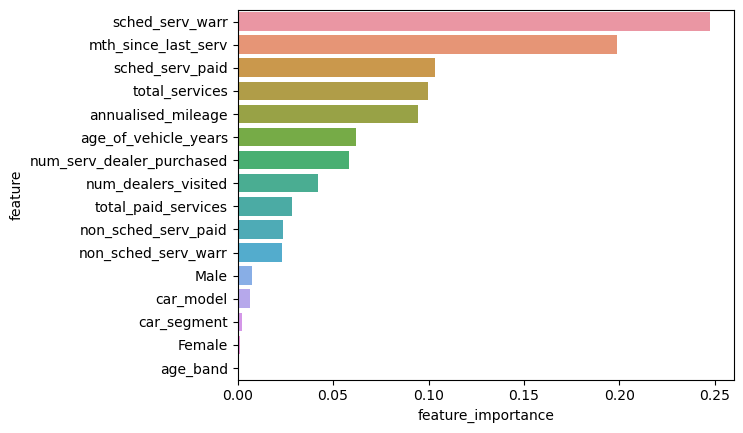

In [69]:
sns.barplot(data= feat_imp_rf, x="feature_importance", y="feature")

## 8. Conclusion

The models trained in this experiment performed well in the training phase but not in the validation and testing phase.
Compared to previous experiments with logistic regression models, KNN and SVC; the decision tree, random forest and extra tree models better fit the categorical data under study.

The presence of overfitting in the different models is evident. The variation of the different hyperparameters for each type of estimator made it possible to improve the degree of overfitting in the models. However, overfitting continues to occur.

The model  [7.9] Random Forest Classifier with max_features = 10 is chosen. It improved the prediction compared to the other models. However, the model presents overfitting due to the score on the training data compared to the validation and testing process. 

In the next experiment, the study will search for a combination of hyperparameters that eliminates the overfitting of the previous models using automated techniques. 

## 9. References

Brownlee, J. (2020a, January 5). ROC Curves and Precision-Recall Curves for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

Brownlee, J. (2020b, January 26). Cost-Sensitive Logistic Regression for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cost-sensitive-logistic-regression/

Brownlee, J. (2020c, June 9). How to Use StandardScaler and MinMaxScaler Transforms in Python. MachineLearningMastery.Com. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Brownlee, J. (2020d, January 12). How to Fix k-Fold Cross-Validation for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/

Czakon, J. (2022, July 21). F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose? Neptune.Ai. https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

Filho, M. (2023, March 24). Do Decision Trees Need Feature Scaling Or Normalization? https://forecastegy.com/posts/do-decision-trees-need-feature-scaling-or-normalization/

Kumar, A. (2020, July 27). MinMaxScaler vs StandardScaler—Python Examples. Data Analytics. https://vitalflux.com/minmaxscaler-standardscaler-python-examples/

Malato, G. (2021, June 7). Precision, recall, accuracy. How to choose? Your Data Teacher. https://www.yourdatateacher.com/2021/06/07/precision-recall-accuracy-how-to-choose/

Olugbenga, M. (2022, July 22). Balanced Accuracy: When Should You Use It? Neptune.Ai. https://neptune.ai/blog/balanced-accuracy

Saxena, S. (2020, March 12). A Beginner’s Guide to Random Forest Hyperparameter Tuning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

scikit-learn developers. (2023a). 3.3. Metrics and scoring: Quantifying the quality of predictions. Scikit-Learn. https://scikit-learn.org/stable/modules/model_evaluation.html

scikit-learn developers. (2023b). Sklearn.tree.DecisionTreeClassifier. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

scikit-learn developers. (2023c). Sklearn.ensemble.ExtraTreesClassifier. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

So, A. (2023). Course Modules: 36106 Machine Learning Algorithms and Applications—Autumn 2023. Lab Solutions. https://canvas.uts.edu.au/courses/26202/modules

